In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



### cnn models library
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,BatchNormalization
from keras.optimizers import Nadam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
train.value_counts()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  pixel10  pixel11  pixel12  pixel13  pixel14  pixel15  pixel16  pixel17  pixel18  pixel19  pixel20  pixel21  pixel22  pixel23  pixel24  pixel25  pixel26  pixel27  pixel28  pixel29  pixel30  pixel31  pixel32  pixel33  pixel34  pixel35  pixel36  pixel37  pixel38  pixel39  pixel40  pixel41  pixel42  pixel43  pixel44  pixel45  pixel46  pixel47  pixel48  pixel49  pixel50  pixel51  pixel52  pixel53  pixel54  pixel55  pixel56  pixel57  pixel58  pixel59  pixel60  pixel61  pixel62  pixel63  pixel64  pixel65  pixel66  pixel67  pixel68  pixel69  pixel70  pixel71  pixel72  pixel73  pixel74  pixel75  pixel76  pixel77  pixel78  pixel79  pixel80  pixel81  pixel82  pixel83  pixel84  pixel85  pixel86  pixel87  pixel88  pixel89  pixel90  pixel91  pixel92  pixel93  pixel94  pixel95  pixel96  pixel97  pixel98  pixel99  pixel100  pixel101  pixel102  pixel103  pixel104  pixel105  pixel106  pixel107  pixel108  pixel109  pix

In [6]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test.value_counts()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  pixel10  pixel11  pixel12  pixel13  pixel14  pixel15  pixel16  pixel17  pixel18  pixel19  pixel20  pixel21  pixel22  pixel23  pixel24  pixel25  pixel26  pixel27  pixel28  pixel29  pixel30  pixel31  pixel32  pixel33  pixel34  pixel35  pixel36  pixel37  pixel38  pixel39  pixel40  pixel41  pixel42  pixel43  pixel44  pixel45  pixel46  pixel47  pixel48  pixel49  pixel50  pixel51  pixel52  pixel53  pixel54  pixel55  pixel56  pixel57  pixel58  pixel59  pixel60  pixel61  pixel62  pixel63  pixel64  pixel65  pixel66  pixel67  pixel68  pixel69  pixel70  pixel71  pixel72  pixel73  pixel74  pixel75  pixel76  pixel77  pixel78  pixel79  pixel80  pixel81  pixel82  pixel83  pixel84  pixel85  pixel86  pixel87  pixel88  pixel89  pixel90  pixel91  pixel92  pixel93  pixel94  pixel95  pixel96  pixel97  pixel98  pixel99  pixel100  pixel101  pixel102  pixel103  pixel104  pixel105  pixel106  pixel107  pixel108  pixel109  pixel110  

- train : 42000
- test : 28000
- train:test= 1.5 : 1

In [8]:
y_train = train['label']

In [9]:
x_train = train.drop('label', axis=1)

In [10]:
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [12]:
y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

-  0~9까지 골고루 들어있음.

In [13]:
train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [14]:
x_train.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

In [15]:
#rescale
x_train = x_train / 255.0
test = test / 255.0

In [16]:
#reshape
X_train = x_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

- RGB 채널아니고 Grayscale 채널이라 28X28X1임.

In [17]:
y_train = to_categorical(y_train, num_classes=10)

- 0~9까지의 숫자를 가지고 있으므로 num_classes 10으로 하여 원핫 인코딩을 한다.

In [18]:
# data split
x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2)

- train:val = 8:2

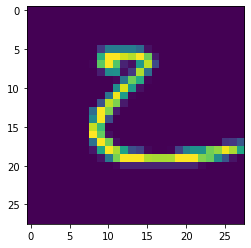

In [20]:
# sample image
a = plt.imshow(x_train[0][:,:,0])

In [22]:
# cnn model
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
__________

- 첫번째 cnn : conv->maxpool->conv->maxpool->conv->maxpool->flatten->dense->dropout->dense

In [25]:
optimizer = Nadam(lr=0.001)

- Adam : RMSProp + Momentum 방향과 스텝 사이즈 적절히 조정
- Nadam : Adam + NAG(Momentum) 대신 사용

In [26]:
#compile
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [28]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5,
                                            mode="min",
                                            min_lr=0.0001)

- **ReduceLROnPlateau : callbacks function**
- 모델의 개선이 없을 경우, learning rate를 조절해 모델의 개선을 유도
- monitor : 기준이 되는 값. val_loss? val_loss가 더이상 감소 않으면 적용.
- verbose 1? EarlyStopping이 적용될 때, 화면에 적용되었다고 나타남.
- patience : Training이 진행됨에도 더이상 monitor되는 값의 개선이 없을 경우, 최적의 monitor 값을 기준으로 몇 번의 epoch을 진행하고, learning rate를 조절할 지의 값
- factor : Learning rate를 얼마나 감소시킬 지 정하는 인자값
- mode : "auto" 또는 "min" 또는 "max", monitor되는 값이 최소가 되어야 하는지, 최대가 되어야 하는지 알려주는 인자입니다.
- min_lr : learning rate의 하한선


In [31]:
history = model.fit(x_train, y_train, batch_size = 100, epochs = 20, 
          validation_data = (x_val, y_val), verbose = 2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 33600 samples, validate on 8400 samples
Epoch 1/20
 - 5s - loss: 0.3095 - acc: 0.9025 - val_loss: 0.0677 - val_acc: 0.9770
Epoch 2/20
 - 3s - loss: 0.0741 - acc: 0.9770 - val_loss: 0.0516 - val_acc: 0.9836
Epoch 3/20
 - 3s - loss: 0.0478 - acc: 0.9851 - val_loss: 0.0443 - val_acc: 0.9858
Epoch 4/20
 - 3s - loss: 0.0376 - acc: 0.9888 - val_loss: 0.0335 - val_acc: 0.9904
Epoch 5/20
 - 3s - loss: 0.0311 - acc: 0.9907 - val_loss: 0.0327 - val_acc: 0.9904
Epoch 6/20
 - 3s - loss: 0.0263 - acc: 0.9917 - val_loss: 0.0364 - val_acc: 0.9899
Epoch 7/20
 - 3s - loss: 0.0225 - acc: 0.9926 - val_loss: 0.0310 - val_acc: 0.9908
Epoch 8/20
 - 3s - loss: 0.0205 - acc: 0.9936 - val_loss: 0.0334 - val_acc: 0.9911
Epoch 9/20
 - 3s - loss: 0.0177 - acc: 0.9945 - val_loss: 0.0361 - val_acc: 0.9904
Epoch 10/20
 - 3s - loss: 0.0147 - acc: 0.9951 - val_loss: 0.0398 - val_acc: 0.9893
Epoch 11/20
 - 3s - loss: 

In [32]:
print('\nAccuracy: {:.4f}'.format(model.evaluate(x_val, y_val)[1]))

8400/8400 [==============================] - 1s 78us/step

Accuracy: 0.9919


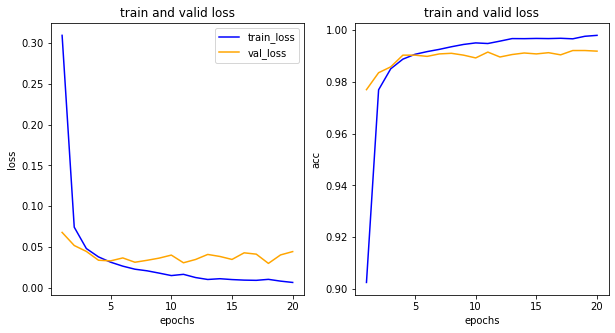

In [33]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize = (10,5))

# train/valid/loss graph
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and valid loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# train/valid/loss acc
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and valid loss')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax1.legend()

plt.show()

- 정확도 99.19%

In [34]:
# image augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [43]:
batch_size=80
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = 20, validation_data = (x_val,y_val),
                              verbose = 2, steps_per_epoch=x_train.shape[0] // batch_size
                             ,callbacks=[learning_rate_reduction])                              

Epoch 1/20
 - 5s - loss: 0.0462 - acc: 0.9863 - val_loss: 0.0300 - val_acc: 0.9918
Epoch 2/20
 - 5s - loss: 0.0404 - acc: 0.9876 - val_loss: 0.0253 - val_acc: 0.9933
Epoch 3/20
 - 5s - loss: 0.0369 - acc: 0.9892 - val_loss: 0.0227 - val_acc: 0.9931
Epoch 4/20
 - 5s - loss: 0.0369 - acc: 0.9885 - val_loss: 0.0243 - val_acc: 0.9926
Epoch 5/20
 - 5s - loss: 0.0316 - acc: 0.9901 - val_loss: 0.0212 - val_acc: 0.9946
Epoch 6/20
 - 5s - loss: 0.0299 - acc: 0.9915 - val_loss: 0.0215 - val_acc: 0.9939
Epoch 7/20
 - 5s - loss: 0.0280 - acc: 0.9916 - val_loss: 0.0228 - val_acc: 0.9940
Epoch 8/20
 - 5s - loss: 0.0276 - acc: 0.9909 - val_loss: 0.0237 - val_acc: 0.9942

Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 9/20
 - 5s - loss: 0.0222 - acc: 0.9936 - val_loss: 0.0185 - val_acc: 0.9950
Epoch 10/20
 - 5s - loss: 0.0202 - acc: 0.9937 - val_loss: 0.0209 - val_acc: 0.9952
Epoch 11/20
 - 5s - loss: 0.0193 - acc: 0.9941 - val_loss: 0.0245 - val_acc: 0.9936
Epoc

In [44]:
print('\nAccuracy: {:.4f}'.format(model.evaluate(x_val, y_val)[1]))

8400/8400 [==============================] - 1s 68us/step

Accuracy: 0.9951


- 정확도 : 99.51%

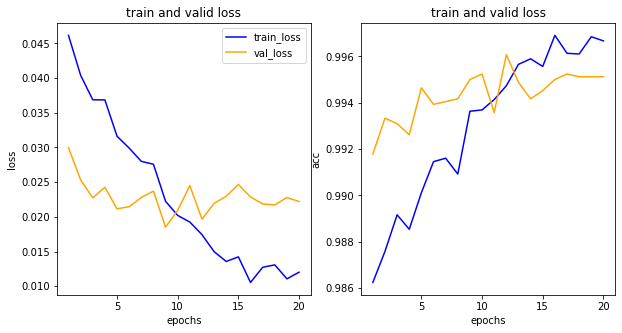

In [45]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize = (10,5))

# train/valid/loss graph
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and valid loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# train/valid/loss acc
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and valid loss')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax1.legend()

plt.show()

- 에폭 8, 12, 15, 18에서 learning_rate 조절했음.

- InceptionV3(92MB), InceptionResNetV2(215MB) => 병렬 구조 실험
- ResNet50(98MB), ResNet101(171MB), ResNet152(232MB), ResNet50V2(98MB), ResNet101V2(171MB), ResNet152V2(232MB) => 직렬 구조 실험 
-> 입력값이 최소 75X75여야함. 
-> 채널도 3채널이여야함.

In [54]:
# cnn model
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [55]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1152)              0         
__________

In [56]:
optimizer = Nadam(lr=0.001)

In [57]:
#compile
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [60]:
history = model.fit(x_train, y_train, batch_size = 100, epochs = 20, 
          validation_data = (x_val, y_val), verbose = 2,callbacks=[learning_rate_reduction])

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
 - 5s - loss: 0.8117 - acc: 0.7471 - val_loss: 0.0798 - val_acc: 0.9755
Epoch 2/20
 - 3s - loss: 0.1864 - acc: 0.9464 - val_loss: 0.0581 - val_acc: 0.9819
Epoch 3/20
 - 4s - loss: 0.1211 - acc: 0.9657 - val_loss: 0.0568 - val_acc: 0.9839
Epoch 4/20
 - 4s - loss: 0.0928 - acc: 0.9741 - val_loss: 0.0419 - val_acc: 0.9882
Epoch 5/20
 - 4s - loss: 0.0774 - acc: 0.9786 - val_loss: 0.0440 - val_acc: 0.9882
Epoch 6/20
 - 4s - loss: 0.0659 - acc: 0.9817 - val_loss: 0.0433 - val_acc: 0.9881
Epoch 7/20
 - 4s - loss: 0.0501 - acc: 0.9858 - val_loss: 0.0333 - val_acc: 0.9912
Epoch 8/20
 - 4s - loss: 0.0504 - acc: 0.9866 - val_loss: 0.0388 - val_acc: 0.9896
Epoch 9/20
 - 4s - loss: 0.0454 - acc: 0.9871 - val_loss: 0.0363 - val_acc: 0.9911
Epoch 10/20
 - 3s - loss: 0.0403 - acc: 0.9883 - val_loss: 0.0325 - val_acc: 0.9908
Epoch 11/20
 - 4s - loss: 0.0393 - acc: 0.9887 - val_loss: 0.0356 - val_acc: 0.9917
Epoch 12/20
 - 4s - loss: 0.0339 - a

In [61]:
print('\nAccuracy: {:.4f}'.format(model.evaluate(x_val, y_val)[1]))

8400/8400 [==============================] - 1s 72us/step

Accuracy: 0.9938


- 정확도 : 99.38%

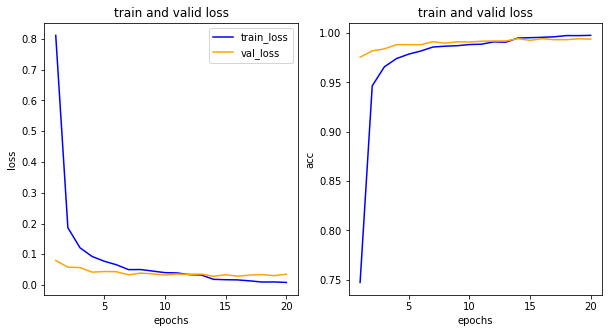

In [62]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize = (10,5))

# train/valid/loss graph
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and valid loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# train/valid/loss acc
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and valid loss')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax1.legend()

plt.show()

- 에폭 13, 17, 20 에서 조절

- 데이터 증강 기법을 사용하여 짠 CNN 모델의 성능이 가장 좋게 나왔음.
- Dense층을 좀더 깊게 짠 CNN 모델이 두번째로 좋은 성능을 보였음.